# Grade prediction 

We are creating model which will predict the final grade of the students

1. EDA(Exploratory Data Analysis)

2. Removing outliers

3. Modelling

4. Saving the model

5. Predicting the result

In [216]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [217]:
df=pd.read_csv('studentgrade.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [218]:
df.shape

(395, 33)

The data contain the 395 rows and 33 columns

In [219]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [220]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [222]:
df.isnull()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
391,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
392,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
393,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [223]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

The dataset does not contain any null values

<Axes: >

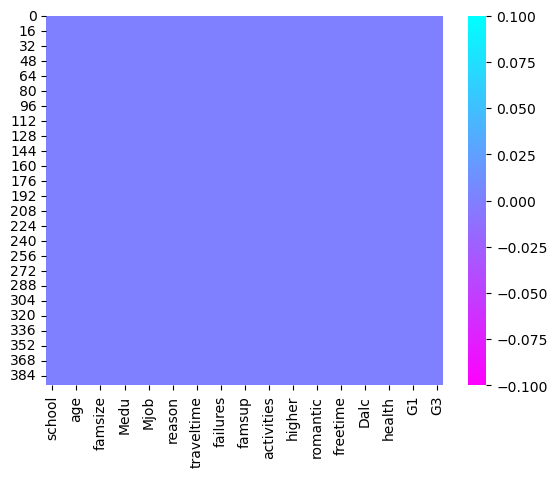

In [224]:
sns.heatmap(df.isnull(),cmap='cool_r')

In [225]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [226]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

The data contain age,Medu and other as integer datatype whereas schholsup and other as object datatype

In [227]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

GP    349
MS     46
Name: school, dtype: int64


F    208
M    187
Name: sex, dtype: int64


16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64


U    307
R     88
Name: address, dtype: int64


GT3    281
LE3    114
Name: famsize, dtype: int64


T    354
A     41
Name: Pstatus, dtype: int64


4    131
2    103
3     99
1     59
0      3
Name: Medu, dtype: int64


2    115
3    100
4     96
1     82
0      2
Name: Fedu, dtype: int64


other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64


other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64


course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64


mother    273
father     90
other      32
Name: guardian, dtype: int64


1    257
2    107
3     23
4      8
Name: traveltime, dtype: int64


2    198
1    105
3     65
4     27
Name: studytime,

In [228]:
df['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

In [229]:
df.nunique().to_frame()

,0
school,2
sex,2
age,8
address,2
famsize,2
Pstatus,2
Medu,5
Fedu,5
Mjob,5
Fjob,5


In [230]:
ax1=df['G3'].value_counts()
ax1

10    56
11    47
0     38
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
20     1
4      1
Name: G3, dtype: int64

In [231]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


<Axes: xlabel='G3', ylabel='count'>

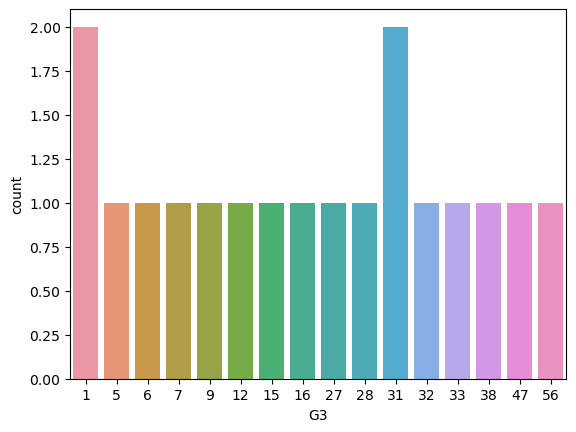

In [232]:
sns.countplot(data=df,x=ax1)

<Axes: xlabel='age', ylabel='G3'>

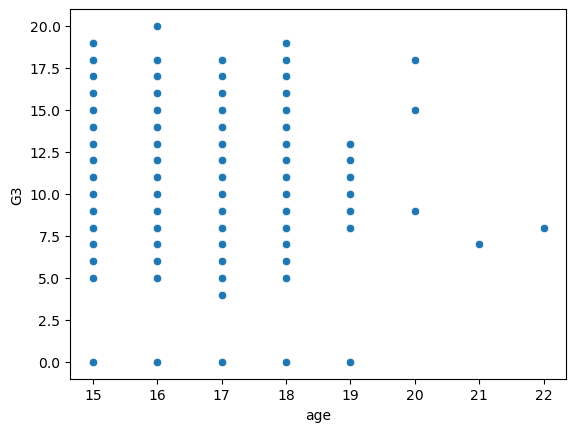

In [233]:
sns.scatterplot(x='age',y='G3',data=df)

<Axes: xlabel='sex', ylabel='count'>

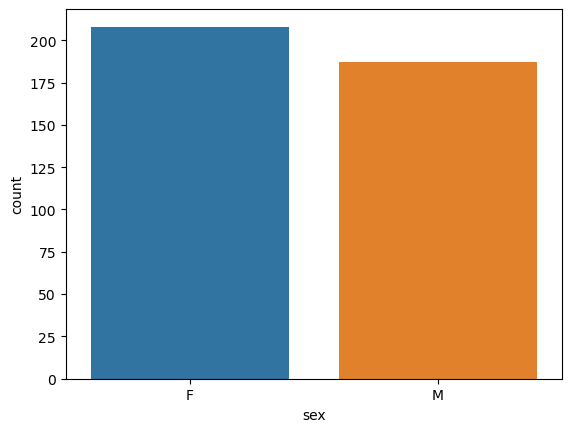

In [234]:
sns.countplot(data=df,x='sex')

The gender distribution is even between male and female 

<Axes: xlabel='age', ylabel='Density'>

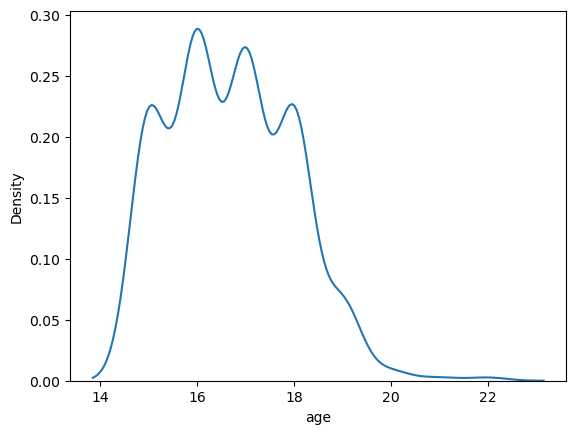

In [235]:
sns.kdeplot(data=df,x='age')

<Axes: xlabel='age', ylabel='count'>

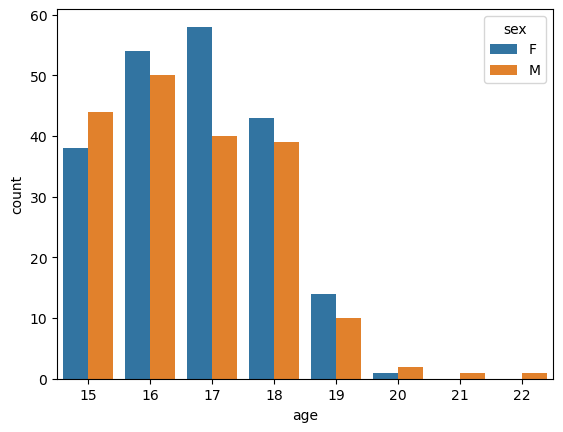

In [236]:
sns.countplot(x='age',hue='sex',data=df)

1. The student age is ranging from 15-19 where as the gender distribution is even 

2. The above 19 age group outliers dropout students

<Axes: xlabel='address', ylabel='count'>

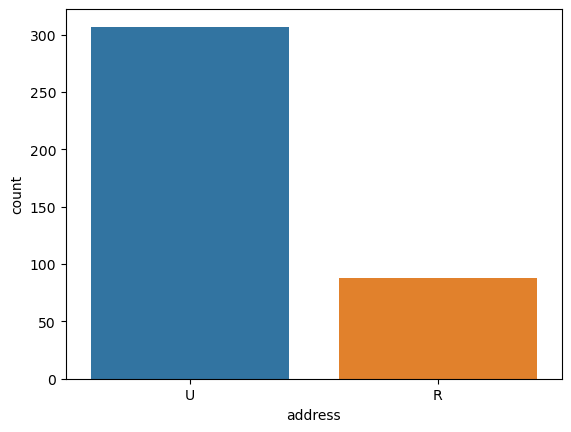

In [237]:
sns.countplot(data=df,x='address')

There are more students which belongs to urban area where as less students which are coming to rural area

<Axes: xlabel='age', ylabel='G3'>

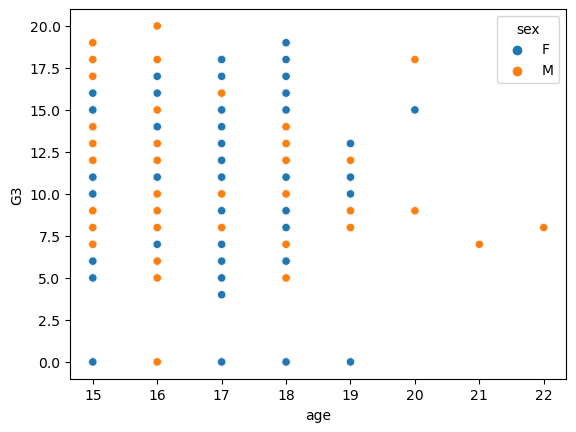

In [238]:
sns.scatterplot(data=df,x='age',y='G3',hue='sex')

1.The grade is pretty much good in age 15-19 range where as it is lower in the age group of 20-22

2. The grade is high of female in age 16 and age 20 to 22

3. The grade for male is lower in the age of 20

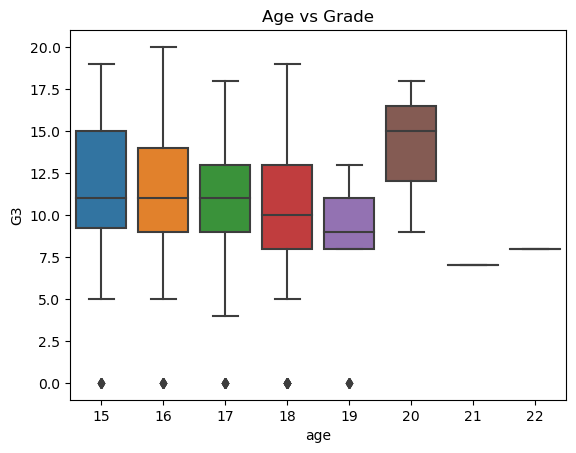

In [239]:
sns.boxplot(x='age',y='G3',data=df)
plt.title('Age vs Grade')
plt.show()

1.From the above box plot we can see that the data is equally distributed between 15-17

2.Age group 20 score highest compared to all age

<Axes: xlabel='higher', ylabel='G3'>

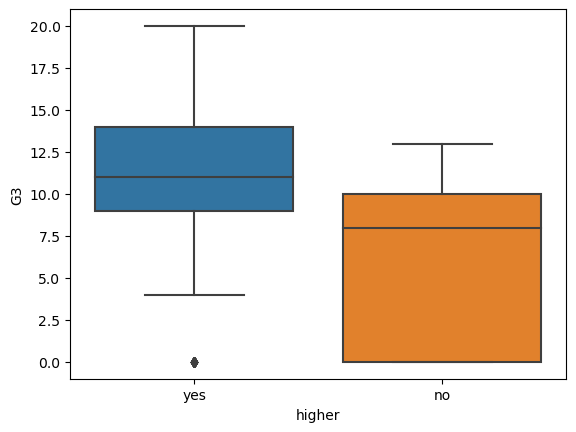

In [240]:
sns.boxplot(x=df['higher'],y=df['G3'])

Sttudent who are willing to go abroad score more compared to low scorer students

<Axes: xlabel='goout', ylabel='count'>

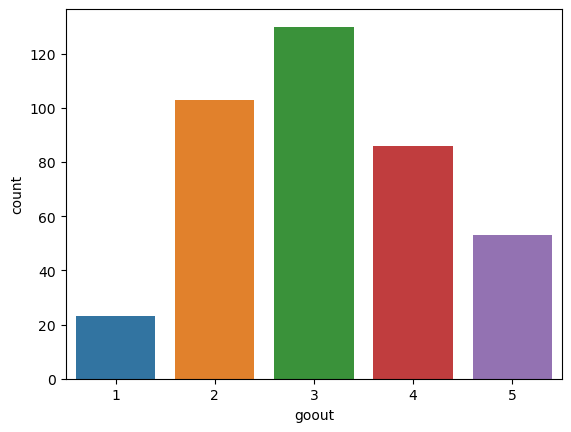

In [241]:
sns.countplot(x=df['goout'])

Students have average score when they going out with friends

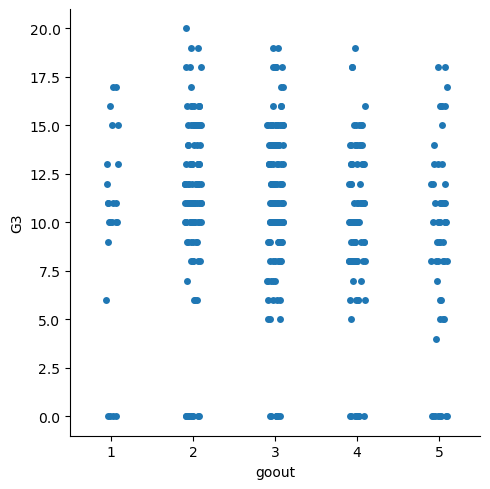

In [242]:
sns.catplot(x=df['goout'],y=df['G3'])

Students when goout with friends score less

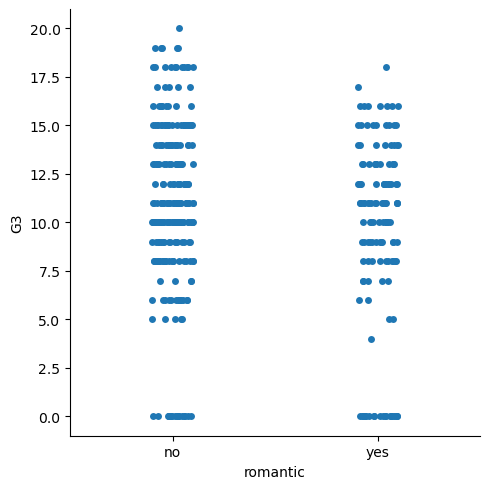

In [243]:
sns.catplot(x=df['romantic'],y=df['G3'])

Students when they are not in relationship will score more compared to when they are in relationship

<Axes: xlabel='reason', ylabel='count'>

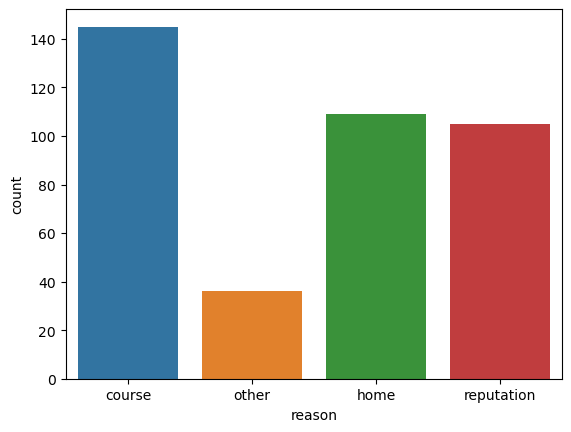

In [244]:
sns.countplot(data=df,x='reason')

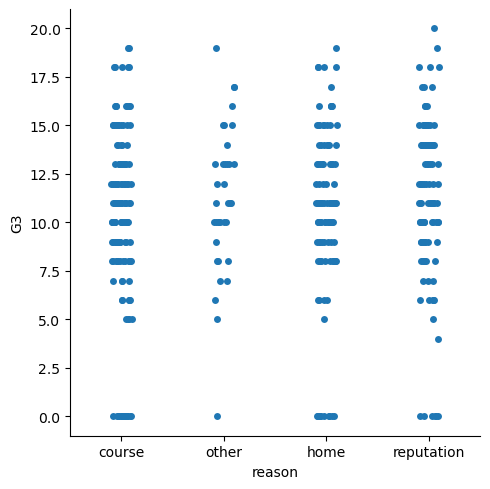

In [245]:
sns.catplot(x='reason',y='G3',data=df)

Students have equally distributed average score when comes to reason attribute

age              Axes(0.125,0.53;0.0824468x0.35)
Medu          Axes(0.223936,0.53;0.0824468x0.35)
Fedu          Axes(0.322872,0.53;0.0824468x0.35)
traveltime    Axes(0.421809,0.53;0.0824468x0.35)
studytime     Axes(0.520745,0.53;0.0824468x0.35)
failures      Axes(0.619681,0.53;0.0824468x0.35)
famrel        Axes(0.718617,0.53;0.0824468x0.35)
freetime      Axes(0.817553,0.53;0.0824468x0.35)
goout            Axes(0.125,0.11;0.0824468x0.35)
Dalc          Axes(0.223936,0.11;0.0824468x0.35)
Walc          Axes(0.322872,0.11;0.0824468x0.35)
health        Axes(0.421809,0.11;0.0824468x0.35)
absences      Axes(0.520745,0.11;0.0824468x0.35)
G1            Axes(0.619681,0.11;0.0824468x0.35)
G2            Axes(0.718617,0.11;0.0824468x0.35)
G3            Axes(0.817553,0.11;0.0824468x0.35)
dtype: object

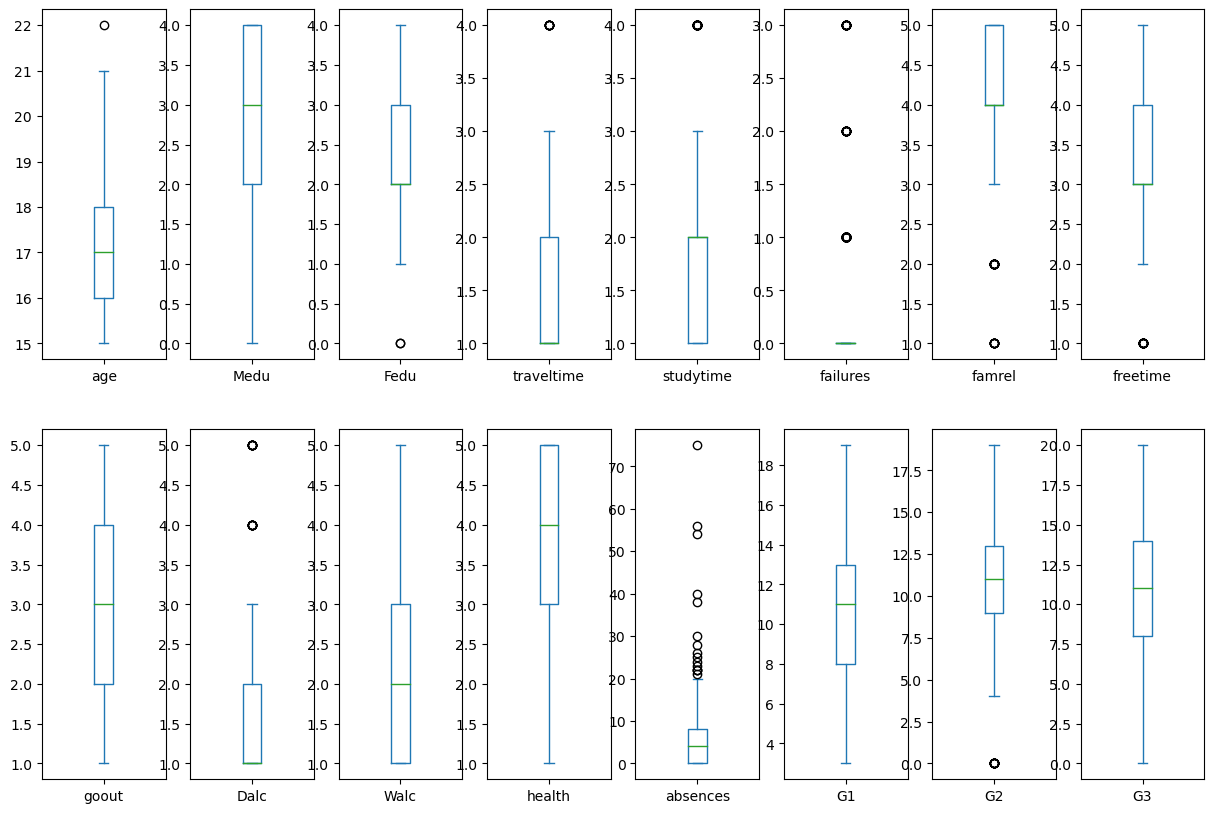

In [246]:
df.plot(kind='box',subplots=True,figsize=(15,10),layout=(2,8))

The boxplot shows absences,traveltime,G2,freetime have the outliers which can be removed by zscore method

In [247]:
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


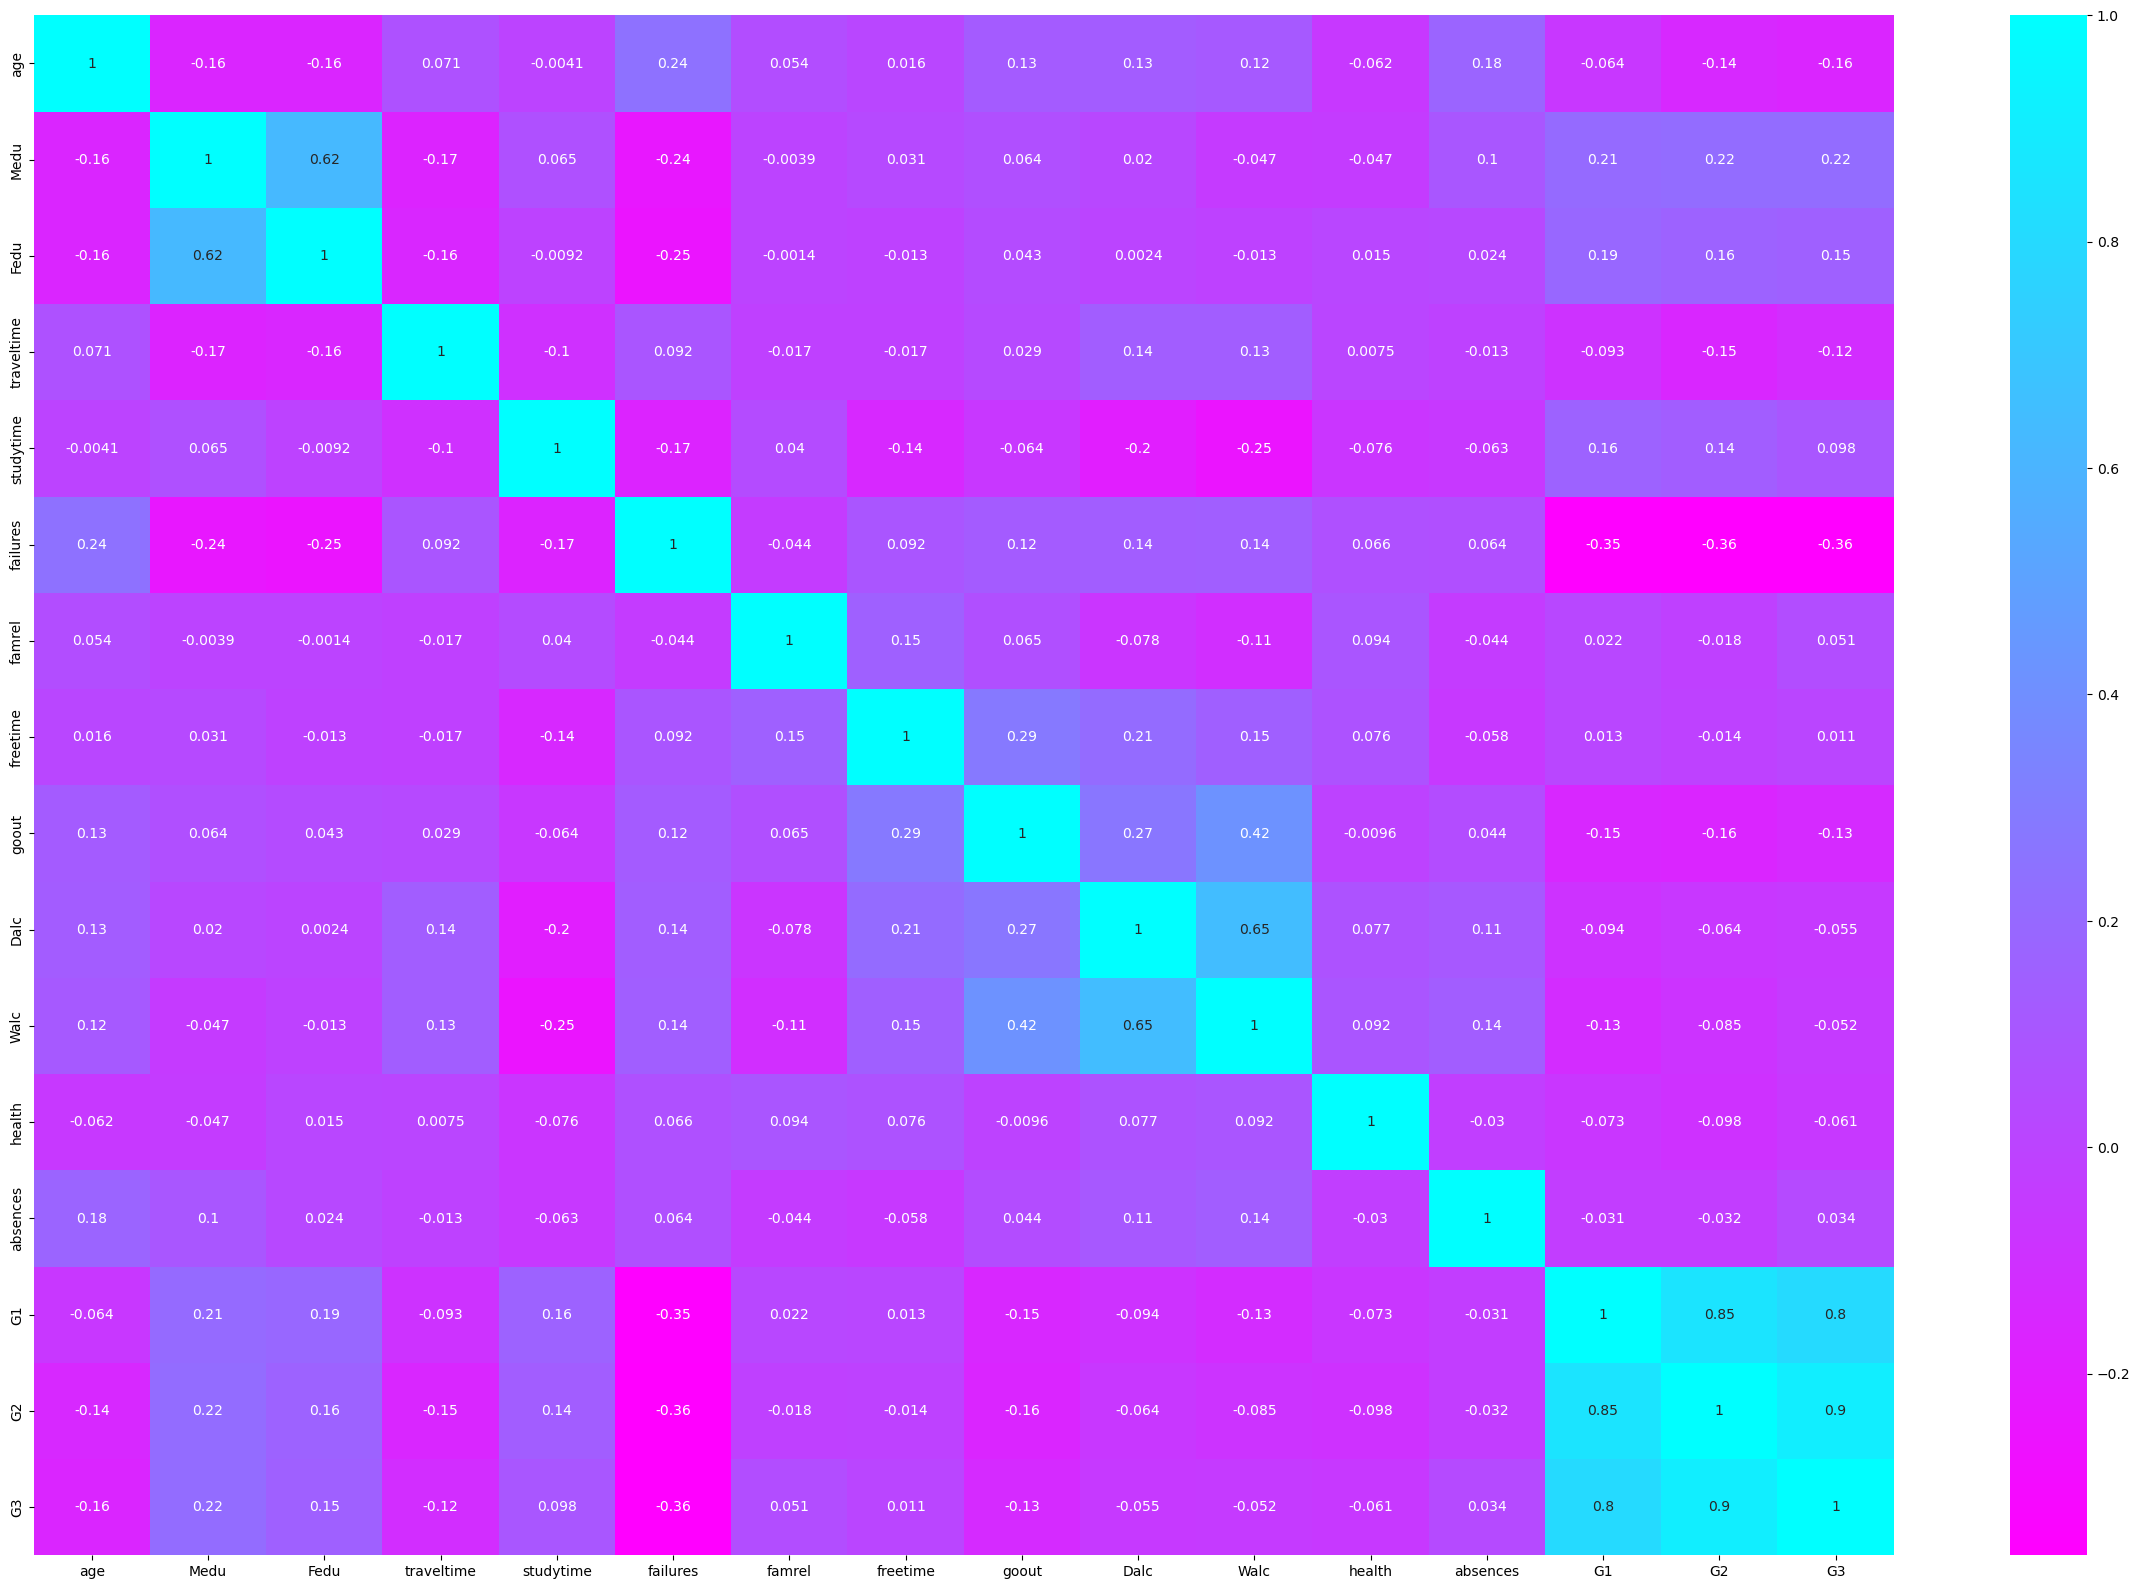

In [248]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True,cmap='cool_r')
plt.show()

From the above heatmap we conclude below point:
    
1. Walc and health are positively correlated with each other

2. dalc and walc are positively correlated with each other

3. Medu and Fedu positively correlated with each other

4. Pstatus and dalc negatively imapcting to G3

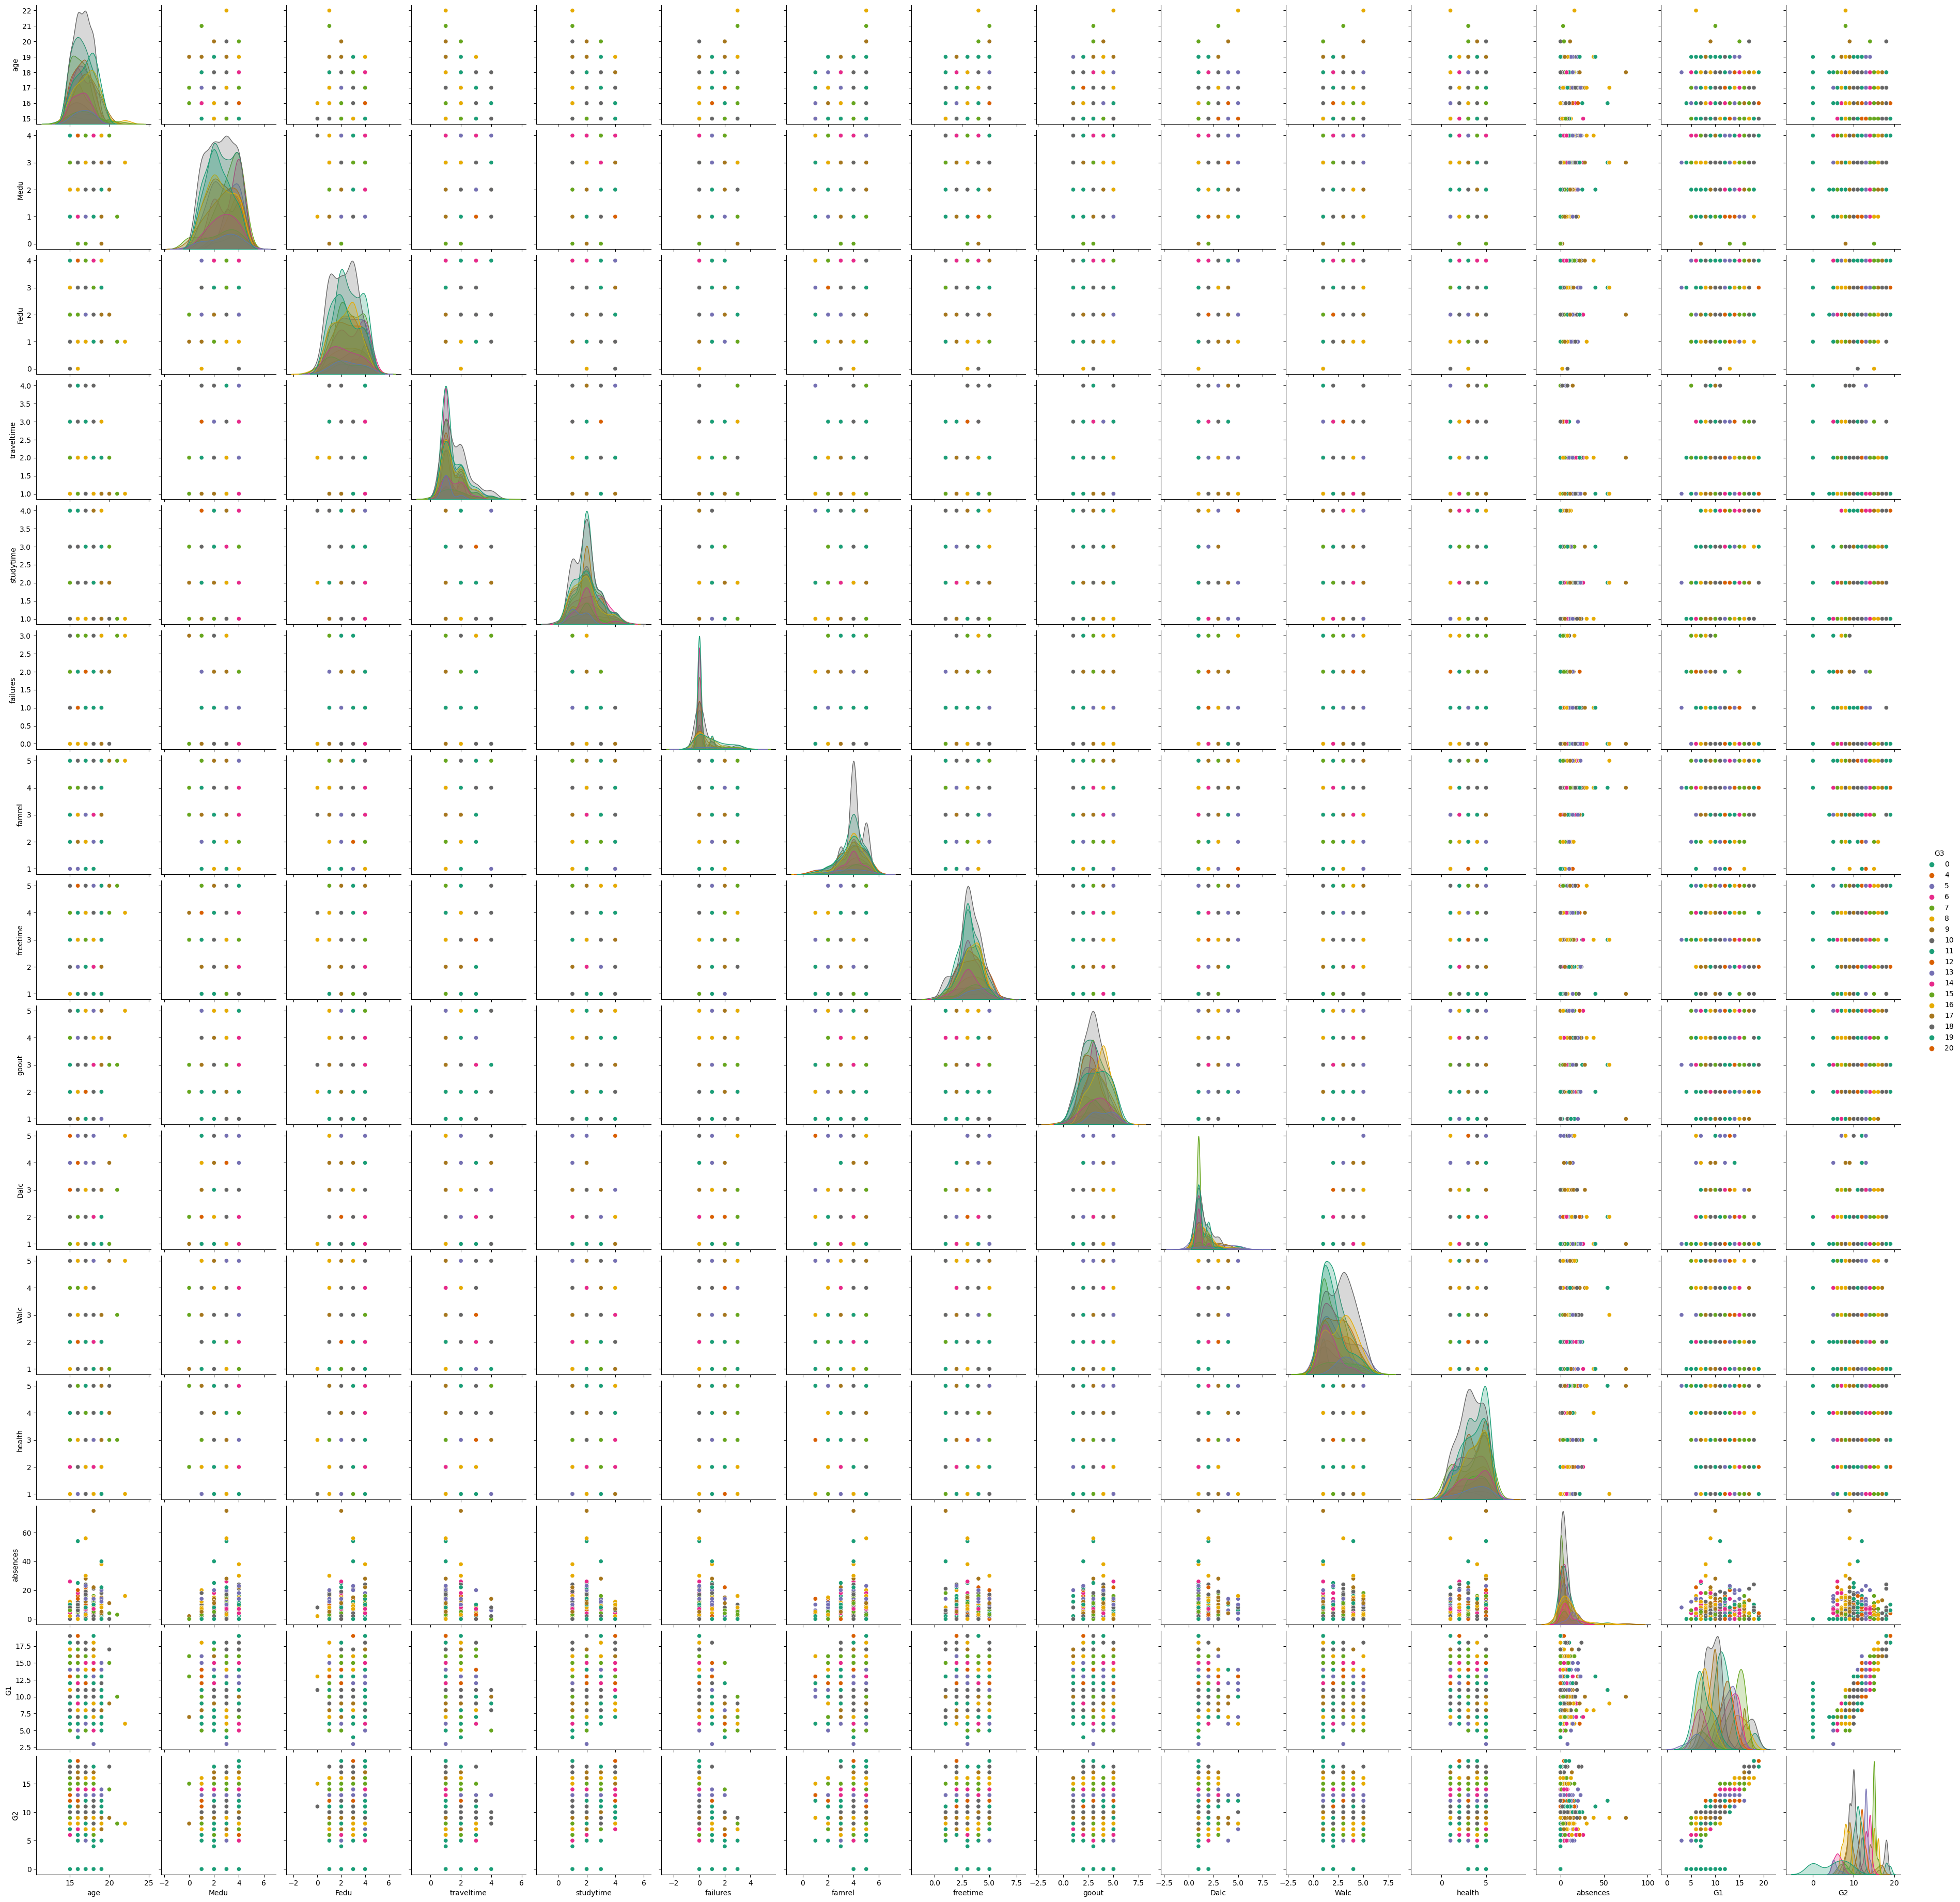

In [249]:
sns.pairplot(data=df,palette='Dark2',hue='G3')

In [250]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [251]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [252]:
df['school']=le.fit_transform(df['school'])
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,0,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,0,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,0,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,0,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,1,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,1,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,1,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [253]:
df['address']=le.fit_transform(df['address'])
df['famsize']=le.fit_transform(df['famsize'])
df['Mjob']=le.fit_transform(df['Mjob'])
df['Pstatus']=le.fit_transform(df['Pstatus'])
df['Fjob']=le.fit_transform(df['Fjob'])
df['reason']=le.fit_transform(df['reason'])
df['guardian']=le.fit_transform(df['guardian'])
df['schoolsup']=le.fit_transform(df['schoolsup'])
df['famsup']=le.fit_transform(df['famsup'])
df['paid']=le.fit_transform(df['paid'])
df['activities']=le.fit_transform(df['activities'])
df['nursery']=le.fit_transform(df['nursery'])
df['higher']=le.fit_transform(df['higher'])
df['internet']=le.fit_transform(df['internet'])
df['romantic']=le.fit_transform(df['romantic'])
df['sex']=le.fit_transform(df['sex'])

In [254]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,5,5,4,4,5,4,11,9,9,9
391,1,1,17,1,1,1,3,1,3,3,...,2,4,5,3,4,2,3,14,16,16
392,1,1,21,0,0,1,1,1,2,2,...,5,5,3,3,3,3,3,10,8,7
393,1,1,18,0,1,1,3,2,3,2,...,4,4,1,3,4,5,0,11,12,10


In [255]:
from scipy.stats import zscore
dfs=np.abs(zscore(df))
print(np.where(dfs>3))

(array([  2,  18,  25,  29,  61,  61,  66,  66,  74,  78,  78, 100, 108,
       108, 127, 127, 134, 144, 146, 148, 149, 149, 150, 150, 153, 153,
       157, 160, 163, 164, 164, 164, 165, 166, 173, 183, 184, 206, 207,
       223, 228, 236, 239, 247, 247, 247, 247, 250, 252, 269, 276, 276,
       280, 299, 307, 311, 315, 327, 327, 349, 350, 352, 357, 361, 371,
       375, 389, 392, 392], dtype=int64), array([14, 14, 23, 26, 12, 26, 23, 26, 29, 14, 20, 26, 12, 23, 14, 20, 12,
       14, 14, 20, 12, 14, 14, 20, 14, 20, 14, 20, 20, 12, 14, 20, 20, 20,
       14, 29, 23, 14, 23, 26, 12, 26, 20,  2, 14, 20, 26, 20, 20, 20, 20,
       29, 29, 23, 29, 20, 29, 12, 26, 26, 14, 20, 23, 20, 20, 12, 23,  2,
       14], dtype=int64))


In [256]:
dfn=df[(dfs<3).all(axis=1)]
dfn

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10
5,0,1,16,1,1,1,4,3,3,2,...,5,4,2,1,2,5,10,15,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,1,0,18,1,1,1,3,1,4,3,...,4,3,4,1,1,1,0,7,9,8
390,1,1,20,1,1,0,2,2,3,3,...,5,5,4,4,5,4,11,9,9,9
391,1,1,17,1,1,1,3,1,3,3,...,2,4,5,3,4,2,3,14,16,16
393,1,1,18,0,1,1,3,2,3,2,...,4,4,1,3,4,5,0,11,12,10


In [257]:
dfn.shape

(342, 33)

In [258]:
df.shape

(395, 33)

In [259]:
dfn['G2'].value_counts()

9     44
10    43
12    34
15    33
11    33
13    31
14    23
8     20
7     14
16    13
6     12
5     12
18    12
0      9
17     5
19     3
4      1
Name: G2, dtype: int64

In [260]:
dfn['G1'].value_counts()

10    43
11    35
8     33
12    31
13    30
7     30
9     28
14    27
15    24
16    21
6     15
18     8
17     8
5      4
19     3
4      1
3      1
Name: G1, dtype: int64

In [261]:
dfn.drop('Pstatus',axis=1,inplace=True)

In [262]:
dfn.drop('Dalc',axis=1,inplace=True)

In [263]:
x=dfn.iloc[:,:-1]
x

,school,sex,age,address,famsize,Medu,Fedu,Mjob,Fjob,reason,...,internet,romantic,famrel,freetime,goout,Walc,health,absences,G1,G2
0,0,0,18,1,0,4,4,0,4,0,...,0,0,4,3,4,1,3,6,5,6
1,0,0,17,1,0,1,1,0,2,0,...,1,0,5,3,3,1,3,4,5,5
3,0,0,15,1,0,4,2,1,3,1,...,1,1,3,2,2,1,5,2,15,14
4,0,0,16,1,0,3,3,2,2,1,...,0,0,4,3,2,2,5,4,6,10
5,0,1,16,1,1,4,3,3,2,3,...,1,0,5,4,2,2,5,10,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,1,0,18,1,1,3,1,4,3,0,...,1,0,4,3,4,1,1,0,7,9
390,1,1,20,1,1,2,2,3,3,0,...,0,0,5,5,4,5,4,11,9,9
391,1,1,17,1,1,3,1,3,3,0,...,1,0,2,4,5,4,2,3,14,16
393,1,1,18,0,1,3,2,3,2,0,...,1,0,4,4,1,4,5,0,11,12


In [264]:
y=dfn.iloc[:,-1]
y

0       6
1       6
3      15
4      10
5      15
       ..
388     8
390     9
391    16
393    10
394     9
Name: G3, Length: 342, dtype: int64

In [265]:
y.value_counts()

10    48
11    42
15    33
0     27
14    27
12    26
9     25
13    25
8     23
6     15
16    15
18    12
17     6
7      6
5      5
19     5
20     1
4      1
Name: G3, dtype: int64

In [266]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,school,sex,age,address,famsize,Medu,Fedu,Mjob,Fjob,reason,...,internet,romantic,famrel,freetime,goout,Walc,health,absences,G1,G2
0,-0.348298,-0.899735,1.138160,0.520937,-0.642824,1.096741,1.311364,-1.803300,1.988742,-1.051573,...,-2.236068,-0.670188,-0.011064,-0.211903,0.877142,-0.989142,-0.388531,0.177720,-1.879143,-1.364903
1,-0.348298,-0.899735,0.318685,0.520937,-0.642824,-1.688547,-1.497529,-1.803300,-0.286006,-1.051573,...,0.447214,-0.670188,1.250242,-0.211903,-0.066199,-0.989142,-0.388531,-0.174629,-1.879143,-1.635510
2,-0.348298,-0.899735,-1.320265,0.520937,-0.642824,1.096741,-0.561231,-0.983182,0.851368,-0.234214,...,0.447214,1.492118,-1.272370,-1.232616,-1.009541,-0.989142,1.047984,-0.526977,1.150876,0.799952
3,-0.348298,-0.899735,-0.500790,0.520937,-0.642824,0.168312,0.375067,-0.163064,-0.286006,-0.234214,...,-2.236068,-0.670188,-0.011064,-0.211903,-1.009541,-0.143426,1.047984,-0.174629,-1.576141,-0.282476
4,-0.348298,1.111438,-0.500790,0.520937,1.555635,1.096741,0.375067,0.657054,-0.286006,1.400504,...,0.447214,-0.670188,1.250242,0.808811,-1.009541,-0.143426,1.047984,0.882417,1.150876,1.070558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,2.871105,-0.899735,1.138160,0.520937,1.555635,0.168312,-1.497529,1.477172,0.851368,-1.051573,...,0.447214,-0.670188,-0.011064,-0.211903,0.877142,-0.989142,-1.825046,-0.879326,-1.273139,-0.553082
338,2.871105,1.111438,2.777110,0.520937,1.555635,-0.760118,-0.561231,0.657054,0.851368,-1.051573,...,-2.236068,-0.670188,1.250242,1.829525,0.877142,2.393723,0.329726,1.058591,-0.667136,-0.553082
339,2.871105,1.111438,0.318685,0.520937,1.555635,0.168312,-1.497529,0.657054,0.851368,-1.051573,...,0.447214,-0.670188,-2.533676,0.808811,1.820484,1.548007,-1.106789,-0.350803,0.847874,1.341165
340,2.871105,1.111438,1.138160,-1.919618,1.555635,0.168312,-0.561231,0.657054,-0.286006,-1.051573,...,0.447214,-0.670188,-0.011064,0.808811,-1.952882,1.548007,1.047984,-0.879326,-0.061132,0.258738


In [267]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [268]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [269]:
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
etpred=ET.predict(x_test)
print('accuracy score',accuracy_score(y_test,etpred))
print('confusion matrix',confusion_matrix(y_test,etpred))
print('classification report',classification_report(y_test,etpred))

accuracy score 0.39805825242718446
confusion matrix [[ 7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  3  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  2  2  1  1  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  1  3  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2 10  6  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  1  3  3  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  1  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  2  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  1  1  3  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  2  0  8  0  1  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  1  4  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]]
classification report               precision    recall  f1-score   support

           0       0.44      1.00      0.61         7


In [270]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
lrpred=LR.predict(x_test)
print("accuracy score",accuracy_score(y_test,lrpred))
print('confusion matrix',confusion_matrix(y_test,lrpred))
print('classification report',classification_report(y_test,lrpred))

accuracy score 0.22330097087378642
confusion matrix [[6 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 1 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 1 2 3 1 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0]
 [2 0 1 0 1 2 5 5 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 3 2 2 3 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 4 1 1 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 2 2 1 0 1 0]
 [0 0 0 0 0 0 0 0 1 2 2 3 0 2 2 0]
 [0 0 0 0 0 0 0 0 1 0 1 3 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]
classification report               precision    recall  f1-score   support

           0       0.55      0.86      0.67         7
           5       0.00      0.00      0.00         2
           6       0.50      0.20      0.29         5
           7       0.00      0.00      0.00         1
           8       0.33      0.11      0.17         9
           9       0.08      0.17      0

In [271]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
rfcpred=RFC.predict(x_test)
print('accuracy score',accuracy_score(y_test,rfcpred))
print('classification report',classification_report(y_test,rfcpred))
print('confusion matrix',confusion_matrix(y_test,rfcpred))

accuracy score 0.44660194174757284
classification report               precision    recall  f1-score   support

           0       0.50      1.00      0.67         7
           5       0.00      0.00      0.00         2
           6       0.60      0.60      0.60         5
           7       0.00      0.00      0.00         1
           8       0.40      0.22      0.29         9
           9       0.40      0.33      0.36         6
          10       0.60      0.50      0.55        18
          11       0.28      0.50      0.36        10
          12       0.33      0.29      0.31         7
          13       0.20      0.20      0.20         5
          14       0.57      0.50      0.53         8
          15       0.44      0.67      0.53        12
          16       0.50      0.17      0.25         6
          17       0.00      0.00      0.00         3
          18       0.67      0.67      0.67         3
          19       0.00      0.00      0.00         1

    accuracy           

In [272]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knnpred=knn.predict(x_test)
print('accuracy score',accuracy_score(y_test,knnpred))
print('classification report',classification_report(y_test,knnpred))
print('confusion matrix',confusion_matrix(y_test,knnpred))

accuracy score 0.23300970873786409
classification report               precision    recall  f1-score   support

           0       0.25      0.71      0.37         7
           4       0.00      0.00      0.00         0
           5       0.50      0.50      0.50         2
           6       0.33      0.40      0.36         5
           7       0.00      0.00      0.00         1
           8       0.50      0.22      0.31         9
           9       0.20      0.33      0.25         6
          10       0.09      0.06      0.07        18
          11       0.20      0.40      0.27        10
          12       0.00      0.00      0.00         7
          13       0.00      0.00      0.00         5
          14       0.42      0.62      0.50         8
          15       0.40      0.17      0.24        12
          16       0.00      0.00      0.00         6
          17       0.00      0.00      0.00         3
          18       0.00      0.00      0.00         3
          19       0.00 

In [273]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtcpred=dtc.predict(x_test)
print('accuracy score',accuracy_score(y_test,dtcpred))
print('confusion matrix',confusion_matrix(y_test,dtcpred))
print('classification report',classification_report(y_test,dtcpred))

accuracy score 0.3592233009708738
confusion matrix [[6 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 2 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [3 0 0 1 1 2 2 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 2 3 0 0 0 0 0 0 0 0 0]
 [4 0 0 1 0 0 3 7 0 2 0 1 0 0 0 0 0]
 [2 0 0 0 0 0 1 1 2 2 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 2 2 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 2 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 6 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 1 3 5 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 3 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]
classification report               precision    recall  f1-score   support

           0       0.38      0.86      0.52         7
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         2
           6       0.25      0.20      0.22         5
           7       0.00   

In [274]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
svcpred=svc.predict(x_test)
print('accuracy score',accuracy_score(y_test,svcpred))
print('classification report',classification_report(y_test,svcpred))
print('confusion report',confusion_matrix(y_test,svcpred))

accuracy score 0.2815533980582524
classification report               precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         9
           9       0.50      0.17      0.25         6
          10       0.27      0.50      0.35        18
          11       0.16      0.60      0.26        10
          12       0.00      0.00      0.00         7
          13       0.00      0.00      0.00         5
          14       0.38      0.38      0.38         8
          15       0.38      0.50      0.43        12
          16       0.00      0.00      0.00         6
          17       0.00      0.00      0.00         3
          18       0.00      0.00      0.00         3
          19       0.00      0.00      0.00         1

    accuracy            

In [275]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(x_train,y_train)
gbpred=gb.predict(x_test)
print(accuracy_score(y_test,gbpred))
print(classification_report(y_test,gbpred))
print(confusion_matrix(y_test,gbpred))

0.17475728155339806
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           5       0.00      0.00      0.00         2
           6       0.18      0.60      0.27         5
           7       0.00      0.00      0.00         1
           8       0.21      0.33      0.26         9
           9       0.11      0.33      0.16         6
          10       0.00      0.00      0.00        18
          11       0.00      0.00      0.00        10
          12       0.00      0.00      0.00         7
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00         8
          15       0.00      0.00      0.00        12
          16       0.29      0.33      0.31         6
          17       0.00      0.00      0.00         3
          18       0.00      0.00      0.00         3
          19       0.33      1.00      0.50         1

    accuracy                           0.17       103
   mac

In [276]:
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print(accuracy_score(y_test,rfcpred)-score.mean())

[0.43478261 0.37681159 0.39705882 0.32352941 0.41176471]
0.3887894288150043
0.05781251293256856


In [277]:
score=cross_val_score(ET,x,y)
print(score)
print(score.mean())
print(accuracy_score(y_test,etpred)-score.mean())

[0.39130435 0.31884058 0.36764706 0.32352941 0.32352941]
0.3449701619778346
0.05308809044934987


In [278]:
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print(accuracy_score(y_test,lrpred)-score.mean())

[0.28985507 0.1884058  0.27941176 0.17647059 0.20588235]
0.22800511508951407
-0.004704144215727651


In [279]:
score=cross_val_score(knn,x,y)
print(score)
print(score.mean())
print(accuracy_score(y_test,knnpred)-score.mean())

[0.17391304 0.14492754 0.19117647 0.13235294 0.22058824]
0.17259164535379368
0.06041806338407041


In [280]:
score=cross_val_score(dtc,x,y)
print(score)
print(score.mean())
print(accuracy_score(y_test,dtcpred)-score.mean())

[0.37681159 0.39130435 0.36764706 0.36764706 0.29411765]
0.3595055413469736
-0.0002822403760998071


In [281]:
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print(accuracy_score(y_test,svcpred)-score.mean())

[0.31884058 0.2173913  0.29411765 0.25       0.16176471]
0.2484228473998295
0.03313055065842291


In [282]:
score=cross_val_score(gb,x,y)
print(score)
print(score.mean())
print(accuracy_score(y_test,gbpred)-score.mean())

[0.26086957 0.15942029 0.16176471 0.19117647 0.22058824]
0.1987638533674339
-0.024006571814035843


The cross validation score for logistic regression is less so our model is Logistic Regression

# Hypertunning the Parameter

In [283]:
from sklearn.model_selection import GridSearchCV
parameters={'penalty':['l1','l2','elasticnet','none'],
            'C':np.logspace(-4,4,20),
            'solver':['lbfgs','newton-cg','liblinear','sag','saga'],
            'max_iter':[100,200,500,1000]}

In [284]:
GV=GridSearchCV(LogisticRegression(),parameters,cv=5)

In [285]:
GV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100, 200, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']})

In [286]:
GV.best_params_

{'C': 4.281332398719396, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}

In [288]:
Final=LogisticRegression(C= 4.281332398719396,max_iter=1000,penalty='l1',solver='saga')
Final.fit(x_train,y_train)
predict=Final.predict(x_test)
accuracy=accuracy_score(predict,y_test)
print(accuracy*100)

32.038834951456316


# Saving the Model

In [291]:
import joblib
joblib.dump(Final,'Grade prediction.pkl')

['Grade prediction.pkl']

In [292]:
Model12=joblib.load('Grade prediction.pkl')
prediction=Model12.predict(x_test)
prediction

array([11, 10, 11, 11, 12, 11, 11, 10, 15,  9,  0,  0, 11,  9, 13,  9, 19,
       15, 15,  0,  8, 18,  0,  0, 15, 14,  9, 10, 14, 10, 12, 10, 12, 13,
        9, 12,  0,  9, 14, 12,  6, 10, 18,  9, 13, 17,  0, 16, 12, 17, 11,
       15,  9,  0, 18, 13, 10, 10,  9,  6, 18,  5,  9, 14, 16, 11, 13, 10,
        0,  0, 18,  8,  8, 15, 11, 10,  9, 16, 16, 18,  0, 11,  6, 11,  9,
       10, 14,  5, 14, 11, 13, 10,  9, 13,  7,  0, 15, 16, 14, 15, 15, 11,
       13], dtype=int64)

In [294]:
data=np.array(y_test)
df=pd.DataFrame()
df['Predicted']=prediction
df['original']=data
df

,Predicted,original
0,11,10
1,10,11
2,11,13
3,11,11
4,12,12
...,...,...
98,14,14
99,15,17
100,15,15
101,11,12
